Problem 1 Sharing and executing the official tutorial model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

2024-01-29 14:40:27.536643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-29 14:40:27.604382: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-29 14:40:27.622682: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 14:40:27.954865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10)])

2024-01-29 14:40:28.711209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-29 14:40:28.743790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2024-01-29 14:40:28.743803: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-01-29 14:40:28.744254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.17558599,  0.5522172 , -0.53299206, -0.02340041,  0.5343383 ,
         0.38539118,  0.07109248,  0.43476442,  0.6447478 , -0.23490956]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.0664226 , 0.13752979, 0.04646184, 0.07734089, 0.13509275,
        0.11639789, 0.08500548, 0.12228908, 0.15086284, 0.06259677]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.1507406

In [8]:
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 810us/step - loss: 0.2937 - accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 1s 752us/step - loss: 0.1444 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.1077 - accuracy: 0.9667
Epoch 4/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.0885 - accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.0750 - accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 1s 693us/step - loss: 0.0647 - accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 1s 746us/step - loss: 0.0575 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.0520 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.0460 - accuracy: 0.9847
Epoch 10/10
1875/1875 [==============================] - 2s 841u

In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0722 - accuracy: 0.9790 - 184ms/epoch - 588us/step


[0.07224106043577194, 0.9789999723434448]

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [12]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.84120055e-10, 4.61796361e-07, 9.11212155e-08, 3.57646991e-06,
        1.92792154e-11, 9.76486092e-09, 1.91434596e-14, 9.99995828e-01,
        2.19882845e-09, 2.03215791e-08],
       [3.91989045e-11, 2.46981813e-06, 9.99997497e-01, 6.01490271e-08,
        5.05666000e-22, 6.53014198e-10, 2.40929764e-14, 1.60005604e-19,
        1.41733834e-08, 1.08961193e-13],
       [1.69072673e-10, 9.99868274e-01, 1.34987931e-06, 1.00957863e-07,
        4.24043037e-06, 4.14698093e-07, 1.52759901e-06, 3.73119583e-05,
        8.67756607e-05, 1.17757026e-09],
       [9.99976635e-01, 2.72682960e-10, 1.16900019e-05, 1.49831547e-09,
        4.83217732e-09, 2.64231426e-06, 2.97507268e-06, 1.64457219e-07,
        5.61293660e-08, 5.73147008e-06],
       [1.83052928e-09, 8.32493186e-14, 5.89559335e-08, 1.68809879e-11,
        9.99270976e-01, 1.00961950e-09, 5.92199623e-09, 1.81717482e-07,
        4.21163087e-08, 7.28616491e-04]], dtype=float32)>

Iris binary classification with Keras

In [13]:
df = pd.read_csv("data/Iris.csv")
#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [15]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                250       
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
4/4 - 0s - loss: 0.5352 - accuracy: 0.7344 - val_loss: 0.2123 - val_accuracy: 0.9375 - 258ms/epoch - 65ms/step
Epoch 2/20
4/4 - 0s - loss: 0.2515 - accuracy: 0.9219 - val_loss: 0.0855 - val_accuracy: 0.9375 - 18ms/epoch - 5ms/step
Epoch 3/20
4/4 - 0s - loss: 0.1366 - accuracy: 0.9531 - val_loss: 0.0389 - val_accuracy: 1.0000 - 18ms/epoch - 4ms/step
Epoch 4/20
4/4 - 0s - loss: 0.0824 - accuracy: 0.9688 - val_loss: 0.0204 - val_accuracy: 1.0000 - 16ms/epoch - 4ms/step
Epoch 5/20
4/4 - 0s - loss: 0.0624 - accuracy: 0.9531 - val_loss: 0.0127 - val_accuracy: 1.0000 - 21ms/epoch - 5ms/step
Epoch 6/20
4/4 - 0s - loss: 0.0426 - accuracy: 0.9844 - val_loss: 0.0317 - val_accuracy: 1.0000 - 18ms/epoch - 5ms/step
Epoch 7/20
4/4 - 0s - loss: 0.0343 - accuracy: 0.9844 - val_loss: 0.0505 - val_accuracy: 0.9375 - 15ms/epoch - 4ms/step
Epoch 8/20
4/4 - 0s - loss: 0.0301 - accuracy: 0.9844 - val_loss: 0.0344 - val_accuracy: 1.0000 - 16ms/epoch - 4ms/step
Epoch 9/20
4/4 - 0s - loss: 0.0171 - a

In [20]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0016376834828406572
Train accuracy: 1.0


Iris multi-level classification with Keras

In [22]:
from keras.utils import np_utils

df = pd.read_csv("data/Iris.csv")
#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)
# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2
# One Hot encoder
y = np_utils.to_categorical(y)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [23]:
# Standardizing
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [24]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                250       
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
5/5 - 0s - loss: 0.7054 - accuracy: 0.6979 - val_loss: 0.4311 - val_accuracy: 0.7917 - 225ms/epoch - 45ms/step
Epoch 2/20
5/5 - 0s - loss: 0.3177 - accuracy: 0.8646 - val_loss: 0.3338 - val_accuracy: 0.7917 - 23ms/epoch - 5ms/step
Epoch 3/20
5/5 - 0s - loss: 0.2240 - accuracy: 0.9167 - val_loss: 0.3707 - val_accuracy: 0.7917 - 17ms/epoch - 3ms/step
Epoch 4/20
5/5 - 0s - loss: 0.1533 - accuracy: 0.9375 - val_loss: 0.3528 - val_accuracy: 0.7917 - 17ms/epoch - 3ms/step
Epoch 5/20
5/5 - 0s - loss: 0.1088 - accuracy: 0.9688 - val_loss: 0.3442 - val_accuracy: 0.7917 - 17ms/epoch - 3ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0802 - accuracy: 0.9583 - val_loss: 0.3143 - val_accuracy: 0.8750 - 19ms/epoch - 4ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0726 - accuracy: 0.9583 - val_loss: 0.3624 - val_accuracy: 0.8750 - 17ms/epoch - 3ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0647 - accuracy: 0.9792 - val_loss: 0.3840 - val_accuracy: 0.8750 - 21ms/epoch - 4ms/step
Epoch 9/20
5/5 - 0s - loss: 0.0655 - a

In [29]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.01869351603090763
Train accuracy: 0.9895833134651184
Test loss: 0.007718940731137991
Test accuracy: 1.0


House Prices with Keras

In [30]:
df = pd.read_csv("data/train.csv")
#Condition extraction from data frame
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.log(np.array(y).reshape(-1, 1))
X = np.array(X).astype(np.float32)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [31]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_class = 1

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='linear'))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                150       
                                                                 
 dense_9 (Dense)             (None, 100)               5100      
                                                                 
 dense_10 (Dense)            (None, 3)                 303       
                                                                 
Total params: 5,553
Trainable params: 5,553
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='mean_squared_error',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['mse'])

In [35]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
47/47 - 0s - loss: 1362.2080 - mse: 1362.2079 - val_loss: 7.5341 - val_mse: 7.5341 - 222ms/epoch - 5ms/step
Epoch 2/20
47/47 - 0s - loss: 10.7079 - mse: 10.7079 - val_loss: 6.4974 - val_mse: 6.4974 - 33ms/epoch - 711us/step
Epoch 3/20
47/47 - 0s - loss: 6.4519 - mse: 6.4519 - val_loss: 4.4065 - val_mse: 4.4065 - 34ms/epoch - 725us/step
Epoch 4/20
47/47 - 0s - loss: 6.4357 - mse: 6.4357 - val_loss: 2.0653 - val_mse: 2.0653 - 36ms/epoch - 755us/step
Epoch 5/20
47/47 - 0s - loss: 2.8843 - mse: 2.8843 - val_loss: 6.3725 - val_mse: 6.3725 - 41ms/epoch - 864us/step
Epoch 6/20
47/47 - 0s - loss: 3.2060 - mse: 3.2060 - val_loss: 2.1895 - val_mse: 2.1895 - 35ms/epoch - 752us/step
Epoch 7/20
47/47 - 0s - loss: 2.2044 - mse: 2.2044 - val_loss: 1.8814 - val_mse: 1.8814 - 33ms/epoch - 704us/step
Epoch 8/20
47/47 - 0s - loss: 2.2246 - mse: 2.2246 - val_loss: 2.1498 - val_mse: 2.1498 - 33ms/epoch - 709us/step
Epoch 9/20
47/47 - 0s - loss: 2.1222 - mse: 2.1222 - val_loss: 1.0357 - val_mse: 

In [36]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train mse:', train_score[1])
print('Test loss:', test_score[0])
print('Test mse:', test_score[1])

Train loss: 0.9579890370368958
Train mse: 0.9579890370368958
Test loss: 5.3781304359436035
Test mse: 5.3781304359436035


MNIST with Keras

In [37]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [38]:
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (10000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape)
print(X_train[0].dtype) # uint8

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8


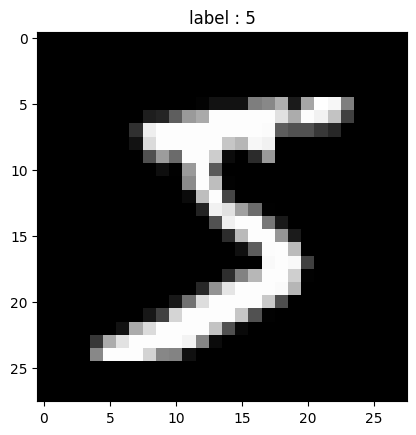

In [40]:
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [42]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train = X_train / 255.0
X_test = X_test / 255.0

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

/tmp/ipykernel_43221/4002362067.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = X_train.astype(np.float)
/tmp/ipykernel_43221/4002362067.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = X_test.astype(np.float)
/home/lkhagvadorj/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarn

(48000, 784)
(10000, 784)


In [43]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

**Model structure**

In [44]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                39250     
                                                                 
 dense_12 (Dense)            (None, 100)               5100      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['accuracy'])

In [47]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
2400/2400 [==============================] - 2s 609us/step - loss: 0.5954 - accuracy: 0.8409 - val_loss: 0.3389 - val_accuracy: 0.9037
Epoch 2/10
2400/2400 [==============================] - 2s 678us/step - loss: 0.3084 - accuracy: 0.9121 - val_loss: 0.2853 - val_accuracy: 0.9178
Epoch 3/10
2400/2400 [==============================] - 2s 709us/step - loss: 0.2654 - accuracy: 0.9252 - val_loss: 0.2561 - val_accuracy: 0.9269
Epoch 4/10
2400/2400 [==============================] - 1s 572us/step - loss: 0.2400 - accuracy: 0.9318 - val_loss: 0.2386 - val_accuracy: 0.9323
Epoch 5/10
2400/2400 [==============================] - 1s 534us/step - loss: 0.2216 - accuracy: 0.9368 - val_loss: 0.2208 - val_accuracy: 0.9377
Epoch 6/10
2400/2400 [==============================] - 2s 679us/step - loss: 0.2067 - accuracy: 0.9413 - val_loss: 0.2098 - val_accuracy: 0.9393
Epoch 7/10
2400/2400 [==============================] - 2s 888us/step - loss: 0.1947 - accuracy: 0.9446 - val_loss: 0.1996 -

In [48]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test_one_hot, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.1630939543247223
Train accuracy: 0.9531458616256714
Test loss: 0.1720542162656784
Test accuracy: 0.9491999745368958
